In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images , train_labels), (test_images , test_labels) = keras.datasets.mnist.load_data()

In [3]:
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")

In [4]:
train_images /= 255.0
test_images /=255.0

In [5]:
#define image varaibles for 4d convnet 
train_len , train_row , train_col = train_images.shape[0] , train_images[0].shape[0] , train_images[0].shape[1]
test_len , test_row , test_col  = test_images.shape[0] , test_images[0].shape[0] , test_images[0].shape[1]
depth = 1 #since image is grayscale /this is also called number of channels
image_shape_for_one_image = (train_row , train_col , depth) #can use the same for both train and test since they are of the same dimention


In [6]:
#reshape the train and test images to a 4d tensor for input to the convnet
train_images = train_images.reshape(train_len , train_row , train_col , depth)
test_images = test_images.reshape(test_len , test_row , test_col , depth)

In [7]:
#one hot encode the labels 

num_of_classes = len(set(train_labels))
train_labels_one_hot = to_categorical(train_labels , num_of_classes)
test_labels_one_hot = to_categorical(test_labels , num_of_classes)

In [8]:
class history_loss(keras.callbacks.Callback):
    def on_train_begin(self , logs ={}):
        self.lossess = []
    def on_batch_end(self , batch , logs):
        self.lossess.append(logs.get("loss"))
#         print(self.lossess)

loss = history_loss()

In [9]:
#build model
model = keras.Sequential([
    keras.layers.Conv2D(32 , (3,3) , activation="relu" , input_shape=image_shape_for_one_image),
    keras.layers.Conv2D(64 , (3,3) , activation="relu"),
    keras.layers.Conv2D(128 , (3,3) , activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128 , activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10 , activation="softmax")
])

In [10]:
model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])

In [11]:
#define some hyperparamenters
batch_size = 128
epochs = 5

In [12]:
import time
start = time.time()
model.fit(train_images , train_labels_one_hot , batch_size=batch_size , epochs=epochs , callbacks=[loss])
total_time = time.time() - start
print("took {} seconds to train".format(total_time))

Epoch 1/5
60000/60000 [==============================] - 375s 6ms/step - loss: 0.1920 - acc: 0.9419
Epoch 2/5
60000/60000 [==============================] - 373s 6ms/step - loss: 0.0716 - acc: 0.9790
Epoch 3/5
60000/60000 [==============================] - 356s 6ms/step - loss: 0.0543 - acc: 0.9837
Epoch 4/5
60000/60000 [==============================] - 351s 6ms/step - loss: 0.0430 - acc: 0.9863
Epoch 5/5
60000/60000 [==============================] - 358s 6ms/step - loss: 0.0376 - acc: 0.9890
took 1813.402723312378 seconds to train


In [22]:
model.save("/home/peter/Desktop/deep-learning/models/cnn_mnist_model.h5" , overwrite=True)

In [66]:
def plot_loss(losses):
    x = np.array(np.arange((len(losses))))
    y = losses
    plt.plot(x , y)
    plt.xlabel("number of epochs")
    plt.ylabel("losses")
    plt.title("epoch loss plot")

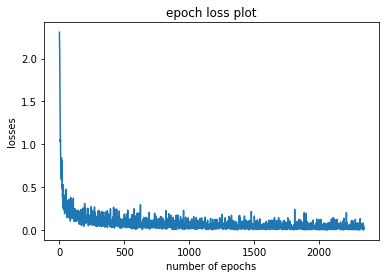

In [146]:
plot_loss(loss.lossess)

In [149]:
#evalute the model
loss , acc = model.evaluate(test_images , test_labels_one_hot)
print("accuracy is " , acc * 100 , "%")

10000/10000 [==============================] - 16s 2ms/step
accuracy is  99.22 %


In [75]:
#make predictions with saved model
# model = keras.models.load_model("/home/peter/Desktop/deep-learning/models/cnn_mnist_model.h5")
predictions = model.predict(test_images)

In [81]:
maxpred = np.argmax(predictions , axis=1)

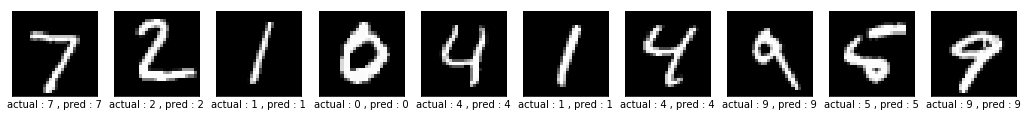

In [145]:
#show actual and predicted
all_images = test_images.reshape(-1 , 28, 28)
plt.figure(figsize=(18,18))
for i in  range(10):
    plt.subplot(1 , 10 , i +1)
    plt.imshow(all_images[i] , cmap="gray")
    plt.xticks([])
    plt.yticks([])
    pred = maxpred[i]
    actual  = test_labels[i]
    if pred == actual:
        plt.xlabel("actual : {} , pred : {}".format(actual , pred))
    else :
        plt.xlabel("actual : {} , pred : {}".format(actual , pred) , color="red")
plt.show()

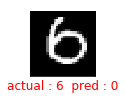

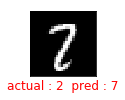

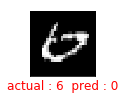

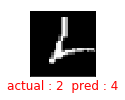

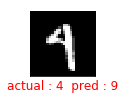

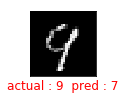

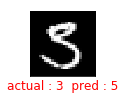

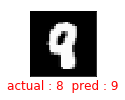

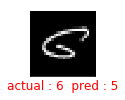

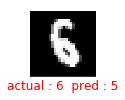

In [142]:
#show wrong predictions
limit = 10
counter = 0
length  = len(maxpred)
for i in range(length):
    pred = maxpred[i]
    actual = test_labels[i]
    
    if(counter == limit):
        break
    if pred != actual:
        counter += 1
        plt.figure(figsize=(1.2,1.2))
        plt.imshow(all_images[i] , cmap="gray")
        plt.xticks([])
        plt.yticks([])
        plt.xlabel("actual : {}  pred : {}".format(test_labels[i] , maxpred[i]) , fontsize=12 , color="red")
        plt.show()